In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mounted google drive to colab for importing data

In [2]:
import pandas as pd
import numpy as np

In [3]:
movie_data = pd.read_csv("/content/drive/MyDrive/a1_IMDB_Dataset.csv")

In [4]:
movie_data.head(3)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive


In [5]:
movie_data.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [6]:
movie_data.shape

(50000, 2)

So there are 50000 rows corresponding to 50000 reviews and 2 columns which are review and sentiment 

In [7]:
movie_data.isnull().values.any()

False

No missing data is found

In [8]:
movie_data.columns

Index(['review', 'sentiment'], dtype='object')

In [9]:
movie_data["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

So there are 25000 datapoints for each class . Hence the data is balanced.

In [10]:
movie_data.duplicated().values.any()

True

In [11]:
movie_data.drop_duplicates(inplace=True)

In [12]:
movie_data.duplicated().values.any()

False

Removed the duplicate datas

In [13]:
movie_data["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

A sample data from the movie_review dataset shows html tags, apostrophe. These things do not provide any semantic meaning for the algorithm to learn . So, it is better to remove them .

In [14]:
import os
import re

In [15]:
html_tag_remover = re.compile(r'<[^>]+>')

def remove_tags(text):
  return html_tag_remover.sub('', text)

The remove_tags function detects anything opening with < and closing with > and replaces with empty space

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
from nltk.corpus import stopwords

In [18]:
def preprocess_text(sen):
  sentence = sen.lower()
  #Converted all texts to lower case

  sentence = remove_tags(sentence)
  #Removed html tags

  sentence = re.sub('[^a-zA-Z]', ' ', sentence)
  #Removed punctuations and numbers

  sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence) 
  #Removed apostrophe

  sentence = re.sub(r'\s+', ' ', sentence)
  #Removed the extra spaces from the text

  pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  sentence = pattern.sub('', sentence)
  #Removed Stopwords

  return sentence

In [19]:
Preprocessed_data = [ ]
sentences = list(movie_data['review'])
for i in sentences:
  Preprocessed_data.append(preprocess_text(i))

Finally applied our preprocessing function on our movie dataset

In [20]:
Preprocessed_data[0]

'one reviewers mentioned watching oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skill

In [21]:
y = movie_data['sentiment']

labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))

Converted the class labels to 0 and 1

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(Preprocessed_data, labels, test_size=0.10, random_state=42)

Finally, splitted the data into train and test with 80% of data going to the train set and rest to the test set

In [24]:
from keras.preprocessing.text import Tokenizer

In [25]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

In [26]:
X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [27]:
print(X_train[:10])

[[2, 2013, 16, 202, 6224, 26206, 560, 2579, 3819, 770, 3048, 1453, 2038, 550, 14, 31578, 214, 650, 187, 279, 9, 25, 326, 112, 1453, 6267, 187, 22, 300, 3, 1823, 17, 27723, 1259, 3, 2257, 155, 847, 6, 9, 31578, 8, 16, 1, 185, 108, 10234, 625], [1513, 11, 125, 585, 1474, 252, 3975, 58, 472, 264, 91, 699, 163, 125, 11443, 1326, 149, 9977, 1019, 6268, 1, 941, 6, 4254, 119, 14206, 218, 29481, 34, 732, 3055, 1997, 9734, 3055, 191, 157, 273, 1327, 8618, 1411, 694, 1971, 4966, 7, 60, 3055, 737, 47883, 3444, 139, 281, 1010, 1656, 2, 2, 12656, 635, 3055, 1, 588, 76, 6225, 3098, 25, 4277, 186, 13, 321, 565, 1317, 175, 86, 106, 5392, 8258, 588, 76, 30, 24, 1619, 3, 193, 19812, 186, 202, 43, 1243, 2563, 1288, 34068, 109, 4945, 2563, 1288, 34068, 74, 19813, 23, 9328, 31579, 524, 1243, 880, 1808, 2526, 14813, 5654, 37, 667, 403, 3748, 3571, 1066, 1275, 469, 62, 43, 3960, 3011, 14207, 5698, 2381, 46, 3444, 234, 1118, 683, 16643, 1411, 125, 82, 41, 312, 17073, 494, 1243, 754, 30, 59, 5699, 667, 5455, 3

So we have splitted our text into individual tokens and converted them to numeric form

In [60]:
word_tokenizer.word_index

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'bad': 14,
 'get': 15,
 'great': 16,
 'people': 17,
 'also': 18,
 'first': 19,
 'made': 20,
 'make': 21,
 'way': 22,
 'could': 23,
 'movies': 24,
 'characters': 25,
 'think': 26,
 'watch': 27,
 'character': 28,
 'films': 29,
 'two': 30,
 'many': 31,
 'seen': 32,
 'never': 33,
 'plot': 34,
 'acting': 35,
 'love': 36,
 'life': 37,
 'best': 38,
 'know': 39,
 'show': 40,
 'little': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'scene': 46,
 'still': 47,
 'say': 48,
 'scenes': 49,
 'something': 50,
 'go': 51,
 'back': 52,
 'real': 53,
 'thing': 54,
 'watching': 55,
 'actors': 56,
 'director': 57,
 'years': 58,
 'old': 59,
 'though': 60,
 'funny': 61,
 'another': 62,
 'work': 63,
 'actually': 64,
 'nothing': 65,
 'look': 66,
 'makes': 67,
 'find': 68,
 'going': 69,
 'lot': 70,
 'new': 71,
 'every': 72,
 'part': 73,
 'wo

In [29]:
vocab_length = len(word_tokenizer.word_index) + 1
print(vocab_length)

96875


This is the total number of words in the vocabulary of our text corpus.   The +1 is added to the length of the word index because the index starts from 1, not 0, so the actual number of words in the vocabulary is one more than the maximum index value.

In [30]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [31]:
X_train = pad_sequences(X_train, padding='post', maxlen=100)
X_test = pad_sequences(X_test, padding='post', maxlen=100)

A neural network model requires fixed length inputs. So , pad_sequence is used to ensure that all input sequences have the same length .It does so by adding zeros until the length is 100 in our case .

In [32]:
import tensorflow as tf
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers.core import Activation,Dense
from keras.layers import Embedding,Dropout

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, 100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(6)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Created a RNN model using Bidirectional LSTM

In [37]:
model.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),metrics=["accuracy"])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         9687500   
                                                                 
 bidirectional_1 (Bidirectio  (None, 12)               5136      
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                130       
                                                                 
 dropout_3 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                      

In [38]:
model_history = model.fit(X_train,y_train,batch_size=128, epochs=8, verbose=1, validation_split=0.1)

Epoch 1/8
314/314 [==============================] - 54s 138ms/step - loss: 0.6894 - accuracy: 0.5945 - val_loss: 0.6783 - val_accuracy: 0.7280
Epoch 2/8
314/314 [==============================] - 25s 79ms/step - loss: 0.6085 - accuracy: 0.7835 - val_loss: 0.4699 - val_accuracy: 0.8694
Epoch 3/8
314/314 [==============================] - 15s 48ms/step - loss: 0.4185 - accuracy: 0.8760 - val_loss: 0.3708 - val_accuracy: 0.8727
Epoch 4/8
314/314 [==============================] - 12s 39ms/step - loss: 0.3200 - accuracy: 0.9110 - val_loss: 0.3304 - val_accuracy: 0.8788
Epoch 5/8
314/314 [==============================] - 11s 35ms/step - loss: 0.2566 - accuracy: 0.9325 - val_loss: 0.3131 - val_accuracy: 0.8821
Epoch 6/8
314/314 [==============================] - 7s 24ms/step - loss: 0.2135 - accuracy: 0.9468 - val_loss: 0.3147 - val_accuracy: 0.8830
Epoch 7/8
314/314 [==============================] - 7s 22ms/step - loss: 0.1806 - accuracy: 0.9569 - val_loss: 0.3232 - val_accuracy: 0.8821


In [39]:
score = model.evaluate(X_test, y_test, verbose=1)

155/155 [==============================] - 1s 6ms/step - loss: 0.3451 - accuracy: 0.8782


In [40]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


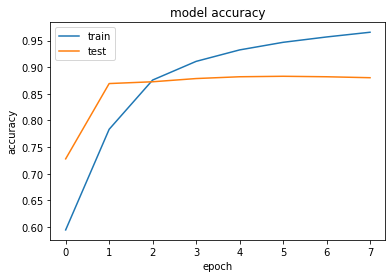

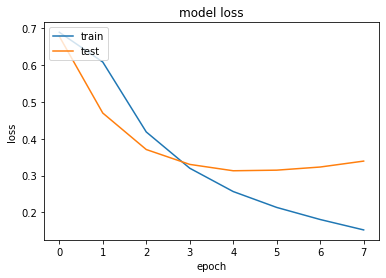

In [41]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [50]:
final_test_reviews = pd.read_csv("/content/drive/MyDrive/a3_IMDb_Unseen_Reviews.csv")
final_test_reviews.head(5)

,Unnamed: 0,Movie,Review Text,IMDb Rating
0,0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9
1,1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10
2,2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3
3,3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1
4,4,Eternals,Amazing visuals and philosophical concepts!\n\...,10


Imported new unseen reviews for testing 

In [54]:
unseen_reviews = final_test_reviews['Review Text']

unseen_processed = []
for review in unseen_reviews:
  review = preprocess_text(review)
  unseen_processed.append(review)

Preprocessed the new data as earlier

In [55]:
unseen_tokenized = word_tokenizer.texts_to_sequences(unseen_processed)

unseen_padded = pad_sequences(unseen_tokenized, padding='post', maxlen=100)

Tokenized and padded the testing data

In [56]:
unseen_sentiments = model.predict(unseen_padded)

unseen_sentiments

1/1 [==============================] - 0s 21ms/step


array([[0.9569908 ],
       [0.9456764 ],
       [0.02128412],
       [0.0204252 ],
       [0.96097714],
       [0.01112733]], dtype=float32)

Passed the data to model for prediction

In [59]:
final_test_reviews['Predicted Sentiments'] = np.round(unseen_sentiments*10,1)

df_prediction_sentiments = pd.DataFrame(final_test_reviews['Predicted Sentiments'], columns = ['Predicted Sentiments'])
df_movie                 = pd.DataFrame(final_test_reviews['Movie'], columns = ['Movie'])
df_review_text           = pd.DataFrame(final_test_reviews['Review Text'], columns = ['Review Text'])
df_imdb_rating           = pd.DataFrame(final_test_reviews['IMDb Rating'], columns = ['IMDb Rating'])

final_df=pd.concat([df_movie, df_review_text, df_imdb_rating, df_prediction_sentiments], axis=1)
final_df.head(5)

,Movie,Review Text,IMDb Rating,Predicted Sentiments
0,Ex Machina,Intelligent Movie.\nThis movie is obviously al...,9,9.6
1,Ex Machina,Extraordinary and thought-provoking.\n'Ex mach...,10,9.5
2,Ex Machina,"Poor story, only reasonable otherwise.\nIf I h...",3,0.2
3,Ex Machina,Had Great Potential.\nThis movie is one of the...,1,0.2
4,Eternals,Amazing visuals and philosophical concepts!\n\...,10,9.6


Calculated the predicted sentiment for each review in the final_test_reviews dataset by multiplying the output of the model by 10 and rounding to one decimal place for comparison purpose.